**Lab 4**

  **Leng Her**
  
  **October 1, 2022**

#Overview

> In order to understand what factors have a possible influence on diabetes, we are using a measure of the progression of the disease and its obeserved relation to other variables. We will also be using a linear regression model to predict disease progression, and to measure whether or not an independent variable can be used to determine the progression of the disease. We will also be creating a multiple linear regression model "to estimate the relationship between two or more independent variables and one independent variable" (Bevans, R). With linear regression and multiple linear regression models we assume that error terms are independent of one another (Shweta). 

>Direct Links (References are at the bottom of Lab):

https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt


https://github.com/Aerlinger/scikit-learn/blob/documentation_improvements/sklearn/datasets/descr/diabetes.rst

 https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html


https://docs.google.com/document/d/1SRvCpvh5R6l4lQa0eGoSQdoYG2331APk84pFgiySfpE/edit

https://www.scribbr.com/statistics/multiple-linear-regression/


https://towardsdatascience.com/linear-regression-assumptions-why-is-it-important-af28438a44a1

https://dss.princeton.edu/online_help/analysis/interpreting_regression.htm 


#Data

>The data was obtained from a module sklearn containing the dataset. The dataset from sklearn is by default scaled whilist the dataset that is directly taken from the source is not scaled. The original source of the data can be found here: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt . For more information about the source data refer to this link: https://github.com/Aerlinger/scikit-learn/blob/documentation_improvements/sklearn/datasets/descr/diabetes.rst. And to understand more about the sklearn moudule with the dataset refer to this link: https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html. 

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

diabetes = datasets.load_diabetes(as_frame = True) #load dataset in scaled form
#refer to https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_diabetes.html for more info

#print(type(diabetes.data)): <class 'pandas.core.frame.DataFrame'>

#import dataframe to pandas data, unscaled
df = pd.read_csv("https://www4.stat.ncsu.edu/~boos/var.select/diabetes.tab.txt", sep="\t")


print(diabetes.DESCR)




.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [12]:
df.head()# Y is representative of disease progression after a year
# s1-s6 are blood serum measurements
#unscaled data

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [13]:
diabetes.data.head() #scaled data

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641


#EDA (Exploratory Data Analysis)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AGE     442 non-null    int64  
 1   SEX     442 non-null    int64  
 2   BMI     442 non-null    float64
 3   BP      442 non-null    float64
 4   S1      442 non-null    int64  
 5   S2      442 non-null    float64
 6   S3      442 non-null    float64
 7   S4      442 non-null    float64
 8   S5      442 non-null    float64
 9   S6      442 non-null    int64  
 10  Y       442 non-null    int64  
dtypes: float64(6), int64(5)
memory usage: 38.1 KB


In [15]:
diabetes.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
dtypes: float64(10)
memory usage: 34.7 KB


The above code gives us general information on the dataset and tells us if there are any missing values. From the result we can see that there are no missing entries with 442 entries and all coulmns cainting that many entries. The difference between the scaled and unscaled seems to be that the unscaled are all  floats meaning they are in decimal form while the unscaled is not.

In [16]:
df.shape

(442, 11)

In [17]:
diabetes.data.shape

(442, 10)

In [30]:
diabetes['target']

0      151.0
1       75.0
2      141.0
3      206.0
4      135.0
       ...  
437    178.0
438    104.0
439    132.0
440    220.0
441     57.0
Name: target, Length: 442, dtype: float64

The above code shows the rows and columns of both the scaled and unscaled datasets. For the scaled dataset it has one less column than the unscaled as it is stored in a different array; the 'target' array which can be shown above aswell.

In [29]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [27]:
df.columns

Index(['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'Y'], dtype='object')

The above code shows the column names. The unscaled has an extra column which is the target varaible in the scaled dataset. The Y is representative of the disease progression value.

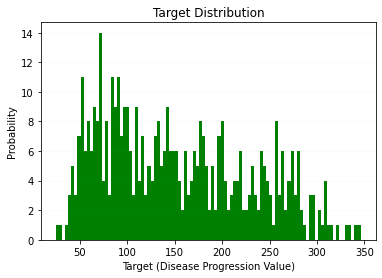

In [39]:
n, bins, patches = plt.hist(x = diabetes.target, bins = 100, color = 'g')
plt.grid(axis='y', alpha=0.05)
plt.xlabel('Target (Disease Progression Value)')
plt.ylabel('Probability')
plt.title('Target Distribution')
plt.show()

The code above is a historgram of the 'target' value (Disease Progression Value). From the histogram we can see that the peak in our values is roughly around 75 which peaks at a probability of 14. Our target variable is skewed to the right.

Note: Code obatined for this can be shown here: https://docs.google.com/document/d/1SRvCpvh5R6l4lQa0eGoSQdoYG2331APk84pFgiySfpE/edit


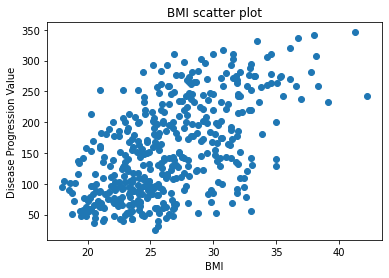

In [41]:
plt.scatter(df['BMI'], diabetes.target)

plt.xlabel('BMI')
plt.ylabel('Disease Progression Value')
plt.title('BMI scatter plot')
plt.show()


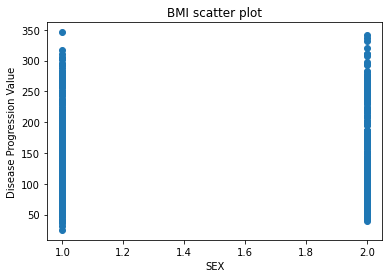

In [44]:
plt.scatter(df['SEX'], diabetes.target)

plt.xlabel('SEX')
plt.ylabel('Disease Progression Value')
plt.title('BMI scatter plot')
plt.show()

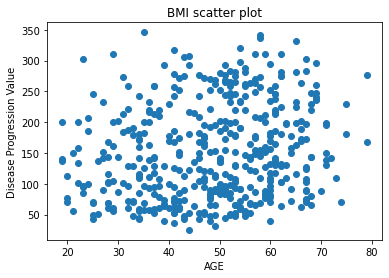

In [45]:
plt.scatter(df['AGE'], diabetes.target)

plt.xlabel('AGE')
plt.ylabel('Disease Progression Value')
plt.title('BMI scatter plot')
plt.show()

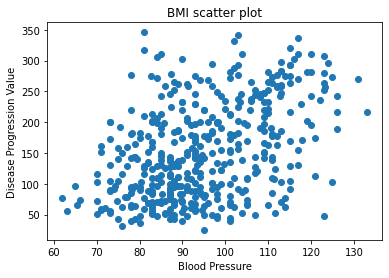

In [46]:
plt.scatter(df['BP'], diabetes.target)

plt.xlabel('Blood Pressure')
plt.ylabel('Disease Progression Value')
plt.title('BMI scatter plot')
plt.show()

We use four scatter plots representing an independent variable and the dependent variable (Disease Progression Value) to oberseve if there exist a relationship. From the four scatter plots we can oberseve that BMI seems to have a positive relationship whereas the other independent values do not have a relationship with our dependent variable. In the case of BMI it would seem that as BMi increases the disease progression value also increases.

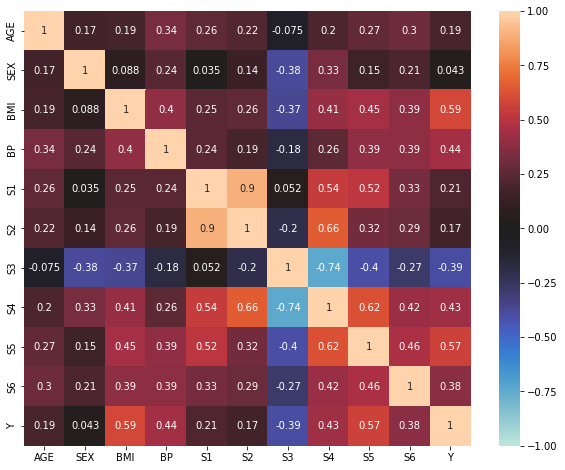

In [50]:
import seaborn as sns
fig, ax = plt.subplots(figsize = (10,8))
corrmat = df.corr()
sns.heatmap(corrmat,-1,1,ax=ax, center = 0, annot = True)


From the correlation matrix there does not seem to be a big correlation between progression of disease and independent variables other than BMI and S5. From the previous scatter plots we can see that BMI has a positive relationship with our dependent variable and with the correlation matrix we can see that it has a positive correlation with progression with a 0.59 value. Because the correlation value with BMI and other independent varaibles are not too high or moderate there does not seem to be a collinearity issue. 

Note: S4 serum tends to be moderately or highly correlated to other serum tests.

#Models

We want to determine what kind of relationship BMI has with progression of disease. From the scatter plots and correlation matrix there seems to be a positive relationship so we will try a linear regression plot.
Code for linear regression model can be found here with more information: https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py



Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


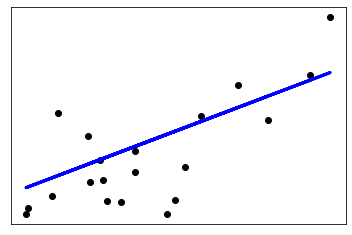

In [112]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature Feature is BMI
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

The model is not too accurate as the r^2 value (coefficient of determination) is quite low. The coefficient of determination ranges from 0 to 100%; and in this case 0.47 can be interpreted as: 47% of our variance can be explained by BMI. Generally the higher the r^2 the better the model is. It is also important to note that the mean squared error is quite high indicating that our model may have a large variance or bias. For this model the formula for the regression line with the coefficient values can be seen as:
y = mx + b -->  **y = 0.47X + 938.23786125**

Because of the low r^2 value and high MSE we should not accept this model.

More information on coefficient of determination : https://dss.princeton.edu/online_help/analysis/interpreting_regression.htm 

> We will create a multiple linear regression model with all independent variables. Code can be found from: https://docs.google.com/document/d/1SRvCpvh5R6l4lQa0eGoSQdoYG2331APk84pFgiySfpE/edit

In [114]:
import statsmodels.api as sm

import statsmodels.api as sm

diabetes_X = diabetes.data
 
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
 
# Create linear regression object
lm = linear_model.LinearRegression()
 
# Train the model using the training sets
fit = lm.fit(diabetes_X_train, diabetes_y_train)
 
# Make predictions using the testing set
diabetes_y_pred = fit.predict(diabetes_X_test)
 
# The coefficients
print('Coefficients: \n', fit.coef_)


# https://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/
# get feature names
colnames = np.asarray(df.columns)

 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
df_col = pd.DataFrame( data = np.asarray(df.columns)  )
df_coef = pd.DataFrame( data = fit.coef_)
df_tbl =  pd.concat ( [df_col, df_coef] , axis = 1 )
df_tbl.columns = ['Columns', 'Coefficients']
df_tbl
 

#  scipy.stats OLS linear regression model
X_train = sm.add_constant(diabetes_X_train)
lm2 = sm.OLS(diabetes_y_train, X_train).fit()
lm2.summary()



Coefficients: 
 [ 3.03499549e-01 -2.37639315e+02  5.10530605e+02  3.27736980e+02
 -8.14131709e+02  4.92814588e+02  1.02848452e+02  1.84606489e+02
  7.43519617e+02  7.60951722e+01]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     43.16
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           4.64e-58
Time:                        00:22:32   Log-Likelihood:                -2281.1
No. Observations:                 422   AIC:                             4584.
Df Residuals:                     411   BIC:                             4629.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.7643      2.658     57.469      0.000     147.539     157.990
age            0.3035     61.286      0.005      0.996    -120.169     120.776
sex         -237.6393     62.837     -3.782      0.000    -361.162    -114.117
bmi          510.5306     68.156      7.491      0.000     376.553     644.508
bp           327.7370     66.876      4.901      0.000     196.275     459.199
s1          -814.1317    424.044     -1.920      0.056   -1647.697      19.434
s2           492.8146    344.227      1.432      0.153    -183.850    1169.480
s3           102.8485    219.463      0.469      0.640    -328.561     534.258
s4           184.6065    167.336      1.103      0.271    -144.334     513.547
s5           743.5196    175.359      4.240      0.000     398.807    1088.232
s6            76.0952     68.293      1.114      0.266     -58.152     210.343
==============================================================================
Omnibus:                        1.544   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.462   Jarque-Bera (JB):                1.421
Skew:                           0.004   Prob(JB):                        0.491
Kurtosis:                       2.716   Cond. No.                         224.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Like our linear regression model with BMI, the multiple linear regression model does not do too well. Both models have similar r^2 (coefficient of determination) values with the linear model regression being 0.47 and the multiple linear regression model being around ~0.5. With these r^2 values we can infer that both models are not accurate. For the formula of this regression line it can be interpreted as: 

y = mx + b -> **y = 0.5X + 152.7643**

> We we will create an different multiple linear regression model and compare it with the first multiple linear regression model. For our second multiple regression model we will remove the serum test independent variables ("s1","s2","s3","s4","s5","s6"). We remove these independent variables as they are moderately or highly correlated with each other, which can be observed from the correlation matrix.

In [115]:
import statsmodels.api as sm

import statsmodels.api as sm

new_data =  diabetes.data.drop(columns = ["s1","s2","s3","s4","s5","s6"])
#remove correlated values

diabetes_X = new_data
 
# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]
 
# Create linear regression object
lm = linear_model.LinearRegression()
 
# Train the model using the training sets
fit = lm.fit(diabetes_X_train, diabetes_y_train)
 
# Make predictions using the testing set
diabetes_y_pred = fit.predict(diabetes_X_test)
 
# The coefficients
print('Coefficients: \n', fit.coef_)


# https://bigdata-madesimple.com/how-to-run-linear-regression-in-python-scikit-learn/
# get feature names
colnames = np.asarray(df.columns)

 
# https://pandas.pydata.org/pandas-docs/stable/user_guide/merging.html
df_col = pd.DataFrame( data = np.asarray(df.columns)  )
df_coef = pd.DataFrame( data = fit.coef_)
df_tbl =  pd.concat ( [df_col, df_coef] , axis = 1 )
df_tbl.columns = ['Columns', 'Coefficients']
df_tbl
 

#  scipy.stats OLS linear regression model
X_train = sm.add_constant(diabetes_X_train)
lm2 = sm.OLS(diabetes_y_train, X_train).fit()
lm2.summary()


Coefficients: 
 [  44.06337675 -101.00555176  776.95460996  419.97903542]


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.394
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     67.74
Date:                Mon, 03 Oct 2022   Prob (F-statistic):           3.87e-44
Time:                        00:50:40   Log-Likelihood:                -2326.9
No. Observations:                 422   AIC:                             4664.
Df Residuals:                     417   BIC:                             4684.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.8300      2.941     51.969      0.000     147.049     158.611
age           44.0634     65.523      0.672      0.502     -84.733     172.860
sex         -101.0056     63.749     -1.584      0.114    -226.316      24.305
bmi          776.9546     67.055     11.587      0.000     645.146     908.763
bp           419.9790     70.823      5.930      0.000     280.764     559.194
==============================================================================
Omnibus:                       10.370   Durbin-Watson:                   1.928
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                6.439
Skew:                           0.135   Prob(JB):                       0.0400
Kurtosis:                       2.459   Cond. No.                         28.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Well...

It appears our second multiple linear regression model is much worse than our original multiple regression model. The r^2 value is 0.394 meaning about ~40% of our variations can be explained by our independent variables (age, sex, bmi, blood pressure). With teh coefficient of determination value being so low, it means that our model is accurate for prediction. 

Our formula for this multiple regression line can be expressed as: 

y = mx + b --> **y = 0.394X + 152.83**

#Conlusion

Overall, in this lab we used linear regression model and two multiple regression models to describe the relationship between our independent variables to our dependent variables. Our independent variables being: 'age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'; and our dependent variable being the progression of the disease (diabetes). From our data we can infer that there is a moderate positive relationship between the progression of the disease and BMI, however we fail to accurately predict values soely based on bmi. This could be due to multiple variables impacting our dependent variable. To verify this we conducted a multiple linear regression model to include all our independent variables and found a slightly better model, however the multiple regression model was observed to be not as significant either with a low coefficient of determination. Because there is an observed positive relationship between BMI and the progression of disease it can be reccomended that lowering BMI can possibly lower the progression of the disease.

# Refercenes


Bevans, R. (2022, June 1). Multiple linear regression: A quick guide (examples). Scribbr. Retrieved October 2, 2022, from https://www.scribbr.com/statistics/multiple-linear-regression/ 

Shweta. (2021, July 15). Linear regression assumptions - why is it important. Medium. Retrieved October 2, 2022, from https://towardsdatascience.com/linear-regression-assumptions-why-is-it-important-af28438a44a1 

The Trustees of Princeton University. (n.d.). DSS - interpreting regression output. Princeton University. Retrieved October 2, 2022, from https://dss.princeton.edu/online_help/analysis/interpreting_regression.htm 
